In [1]:
from keras.layers import Input, Dense
from keras.models import Model

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train, x_test
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11493376/11490434 [==============================] - 0s 0us/step





Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 11s 191us/step - loss: 0.3900 - val_loss: 0.2618
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2558 - val_loss: 0.2522
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2514 - val_loss: 0.2507
Epoch 4/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2504 - val_loss: 0.2502
Epoch 5/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2499 - val_loss: 0.2498
Epoch 6/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2495 - val_loss: 0.2493
Epoch 7/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2491 - val_loss: 0.2487
Epoch 8/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2485 - val_loss: 0.2479
Epoch 9/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2464 - val_loss: 0.

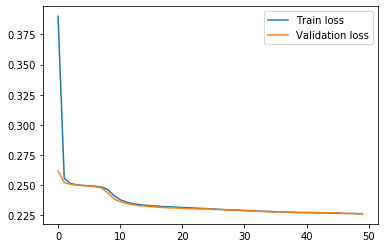

In [3]:
import matplotlib.pyplot as plt

output = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

plt.plot(output.history['loss'], label='Train loss')
plt.plot(output.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

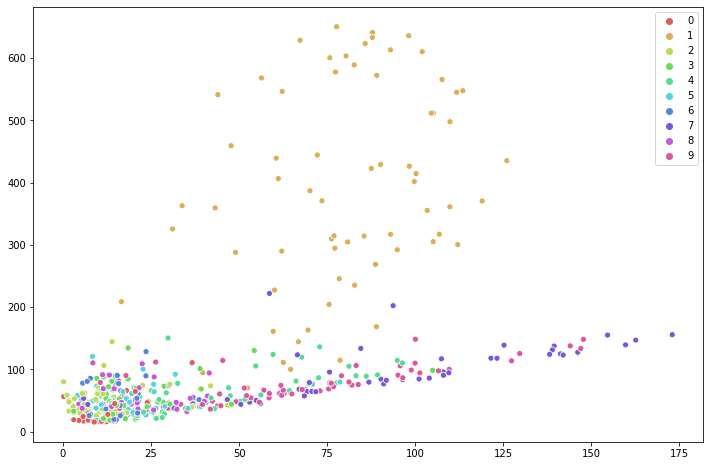

In [13]:
import seaborn as sns

x_to_plot = x_test[:500, :]
y_to_plot = y_test[:500]

encoded_imgs = encoder.predict(x_to_plot)

_, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(encoded_imgs[:, 0], encoded_imgs[:, 1], hue=y_to_plot, ax=ax, palette=sns.color_palette("hls", len(set(y_to_plot))))